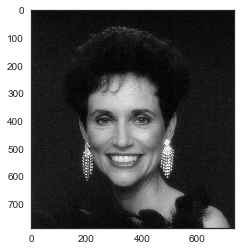

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


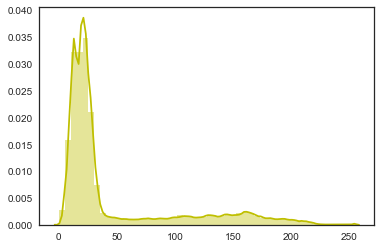

In [27]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH04/Fig0450(a)(woman_original).tif')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()
ax = sns.distplot(im.flatten(), color="y")

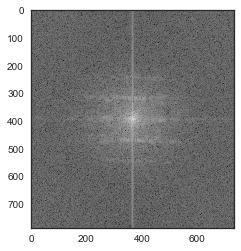

In [28]:
shift_im = np.zeros(im.shape)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        shift_im[i][j] = np.power(-1,i+j)*im[i][j]
fft_img_shift = np.fft.fft2(shift_im)
new_pic = 1+np.log10(fft_img_shift)
plt.imshow(np.abs(new_pic))
plt.show()

[[ 1.00000000+0.j         -0.99997893-0.00649081j  0.99776384+0.06683799j
  ...,  0.50318244-0.86418021j  0.99776384-0.06683799j
  -0.99997893+0.00649081j]
 [-0.77552963+0.63131117j  0.99666535-0.08159771j -0.42202745-0.90658305j
  ...,  0.99475353+0.10230062j -0.92199094+0.38721146j
   0.80278382-0.59627018j]
 [ 0.72568691+0.68802508j -0.89992978-0.43603485j  0.23909219+0.97099687j
  ...,  0.17362942-0.98481106j  0.51374497+0.85794295j
   0.88873085-0.45842936j]
 ..., 
 [ 0.99962310+0.02745295j  0.61709937-0.78688524j -0.13474717+0.99088001j
  ..., -0.87473363-0.48460405j  0.98666737-0.1627498j
  -0.83561752-0.54931171j]
 [ 0.72568691-0.68802508j  0.88873085+0.45842936j  0.51374497-0.85794295j
  ..., -0.09592751+0.99538832j  0.23909219-0.97099687j
  -0.89992978+0.43603485j]
 [-0.77552963-0.63131117j  0.80278382+0.59627018j -0.92199094-0.38721146j
  ..., -0.31138266-0.95028461j -0.42202745+0.90658305j
   0.99666535+0.08159771j]]
[[  3.46678413e-03 -2.34736211e-16j   2.42255390e-03 -1.1

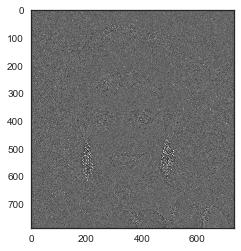

In [29]:
fft_img = np.fft.fft2(im)
mag = np.abs(fft_img)
phase = np.angle(fft_img)
demag_fft = np.divide(fft_img,mag)
print(demag_fft)
construct_img = np.fft.ifft2(demag_fft)
print(construct_img)
plt.imshow(np.real(construct_img))
plt.show()

(785, 732)


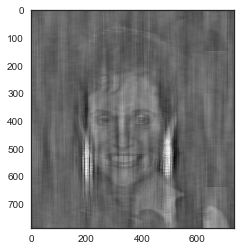

In [56]:
im2 = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH04'+'/Fig0424(a)(rectangle).tif')
im2 = im2.resize((732, 785))
im2 = np.asarray(im2.convert('L'))
im2_fft = np.fft.fft2(im2)
im2_mag = np.abs(im2_fft)
print(im2.shape)
mix_fft = np.multiply(im2_mag,demag_fft)
new_pic_mix = np.fft.ifft2(mix_fft)
plt.imshow(np.real(new_pic_mix))
plt.show()

In [26]:
phase.shape

(785, 732)

In [36]:
im2_fft.shape

(732, 785)

In [53]:
np.real(new_pic_mix)[100:200,100:200]

array([[  1.05599067e-12,   3.38395983e-13,   2.49511435e-13, ...,
          9.80667532e-13,   4.49730966e-14,   4.61697253e-13],
       [  6.72824246e-13,  -3.29608533e-14,  -8.75595368e-14, ...,
          3.73342280e-13,  -4.93272429e-13,  -5.59420979e-14],
       [  4.07459882e-13,  -3.81909347e-13,  -5.42495159e-13, ...,
          2.67307572e-13,  -7.30501075e-13,  -2.94362779e-13],
       ..., 
       [  4.92178827e-13,   1.01298286e-13,   8.21987759e-13, ...,
          1.16248964e-12,  -4.20189889e-13,  -3.18290525e-13],
       [  3.66891280e-13,   4.76477417e-14,   7.89380520e-13, ...,
          1.11440509e-12,  -3.52755200e-13,  -1.86374506e-13],
       [ -4.35238039e-14,  -3.34629352e-13,   4.81801086e-13, ...,
          4.34903646e-13,  -1.05624888e-12,  -9.20765687e-13]])